In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [5]:
transform = transforms.Compose([
    transforms.ToTensor()
])
dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)
image,label=dataset[0]
image = image.unsqueeze(0)

In [6]:
conv=nn.Conv2d(in_channels=3,out_channels=8,kernel_size=3,padding=1)
relu = nn.ReLU()
max_pool=nn.MaxPool2d(kernel_size=2,stride=2)
avg_pool=nn.AvgPool2d(kernel_size=2,stride=2)

In [9]:
feature_before_pool = relu(conv(image))

feature_max_pool = max_pool(feature_before_pool)
feature_avg_pool = avg_pool(feature_before_pool)


In [11]:
def plot_feature_maps(feature_map,title,num_maps=4):
    feature_map=feature_map.squeeze(0)
    plt.figure(figsize=(8,2))
    for i in range(num_maps):
        plt.subplot(1,num_maps,i+1)
        plt.imshow(feature_map[i].detach().cpu(),cmap="gray")
        plt.axis("off")
    plt.suptitle(title)
    plt.show()


<function plot_feature_maps at 0x000001C2450C47C0>


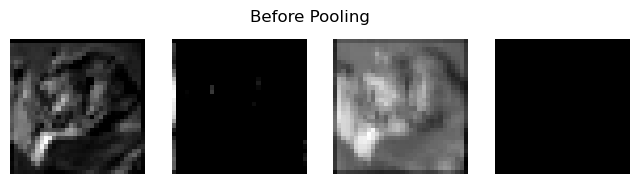

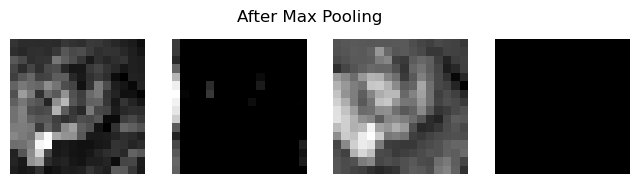

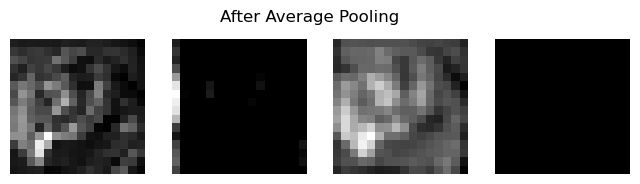

In [12]:
plot_feature_maps(feature_before_pool,"Before Pooling")
plot_feature_maps(feature_max_pool,"After Max Pooling")
plot_feature_maps(feature_avg_pool,"After Average Pooling")